In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Air_Reserve.csv

In [2]:
df = pd.read_csv("../data/raw/air_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


In [4]:
df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [5]:
df.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [6]:
df.isnull().values.any()

False

## air_store_id column

In [7]:
print('The dataset contains info about %s restaurants' % len(df['air_store_id'].unique()))

The dataset contains info about 314 restaurants


In [8]:
# The restaurants sorted by number of reservations
df['air_store_id'].value_counts()

air_8093d0b565e9dbdf    2263
air_e55abd740f93ecc4    1903
air_0a74a5408a0b8642    1831
air_cf5ab75a0afb8af9    1758
air_6d65542aa43b598b    1436
air_de692863bb2dd758    1355
air_326ca454ef3558bc    1282
air_03963426c9312048    1267
air_483eba479dc9910d    1232
air_f911308e19d64236    1197
air_3bb99a1fe0583897    1185
air_24b9b2a020826ede    1143
air_5f6fa1b897fe80d5    1134
air_6b15edd1b4fbb96a    1085
air_877f79706adbfb06    1061
air_2cee51fa6fdf6c0d    1057
air_96743eee94114261     996
air_2d3afcb91762fe01     952
air_a083834e7ffe187e     938
air_1408dd53f31a8a65     918
air_d6b3e67261f07646     898
air_af63df35857b16e6     870
air_7831b00996701c0f     858
air_4092cfbd95a3ac1b     854
air_3c05c8f26c611eb9     839
air_9b6af3db40da4ae2     836
air_de803f7e324936b8     832
air_e7fbee4e3cfe65c5     828
air_3cad29d1a23209d2     823
air_4b55d8aea1d2b395     814
                        ... 
air_1f1390a8be2272b3       2
air_1d1e8860ae04f8e9       2
air_fee8dcf4d619598e       2
air_a9133955ab

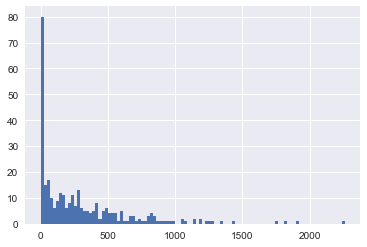

In [9]:
df['air_store_id'].value_counts().hist(bins=100)

In [24]:
# The restaurants sorted by overall number of reserve visitors
df.groupby('air_store_id')['reserve_visitors'] \
    .agg({"Overall number of reserved seats": "sum"}) \
    .sort_values(by="Overall number of reserved seats", ascending=False)

/Users/mariuszrokita/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


,Overall number of reserved seats
air_store_id,
air_e55abd740f93ecc4,8355
air_03963426c9312048,8200
air_8093d0b565e9dbdf,7458
air_326ca454ef3558bc,7385
air_3bb99a1fe0583897,7321
air_24b9b2a020826ede,7122
air_cf5ab75a0afb8af9,6750
air_de692863bb2dd758,5746
air_f911308e19d64236,5726


## visit_datetime

In [11]:
df['visit_datetime'].describe()

count                   92378
unique                   4975
top       2016-12-24 19:00:00
freq                      255
first     2016-01-01 19:00:00
last      2017-05-31 21:00:00
Name: visit_datetime, dtype: object

In [12]:
df['visit_datetime'].min()

Timestamp('2016-01-01 19:00:00')

In [13]:
df['visit_datetime'].max()

Timestamp('2017-05-31 21:00:00')

## reserve_datetime

In [14]:
df['reserve_datetime'].describe()

count                   92378
unique                   7513
top       2016-11-24 18:00:00
freq                      106
first     2016-01-01 01:00:00
last      2017-04-22 23:00:00
Name: reserve_datetime, dtype: object

In [15]:
df['reserve_datetime'].min()

Timestamp('2016-01-01 01:00:00')

In [16]:
df['reserve_datetime'].max()

Timestamp('2017-04-22 23:00:00')

## reserve_visitors

In [17]:
df['visit_datetime_weekdayname'] = df['visit_datetime'].dt.weekday_name
df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name

In [18]:
df['visit_datetime_month'] = df['visit_datetime'].dt.month
df['reserve_datetime_month'] = df['reserve_datetime'].dt.month

In [19]:
df['reserve_visitors'].describe()

count    92378.000000
mean         4.481749
std          4.919669
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        100.000000
Name: reserve_visitors, dtype: float64

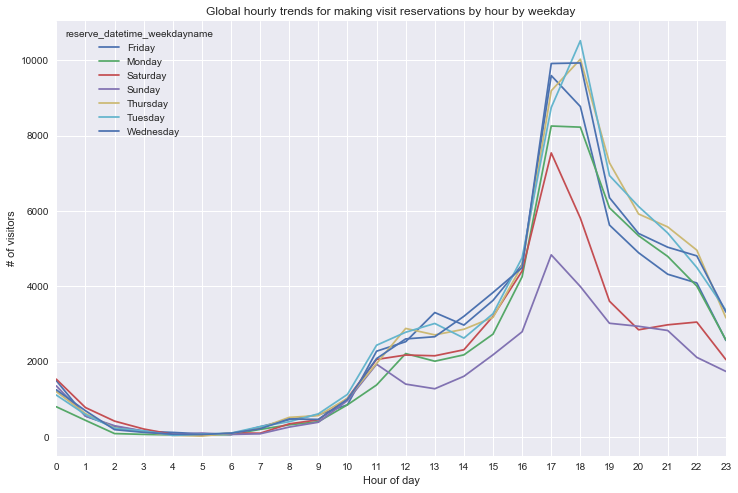

In [20]:
ax = df.pivot_table(index=df['reserve_datetime'].dt.hour, 
                    columns='reserve_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for making visit reservations by hour by weekday',
                                        xticks=np.arange(0, 24, 1))
 
ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

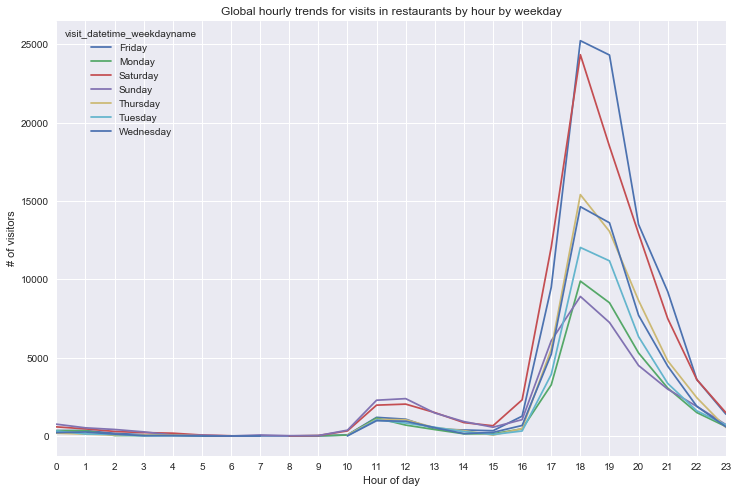

In [21]:
ax = df.pivot_table(index=df['visit_datetime'].dt.hour, 
                    columns='visit_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for visits in restaurants by hour by weekday',
                                        xticks=np.arange(0, 24, 1))

ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

In [22]:
df_visits = df[['visit_datetime', 'reserve_visitors']]

# Set index and delete the column
df_visits.index = df_visits['visit_datetime']
del df_visits['visit_datetime']

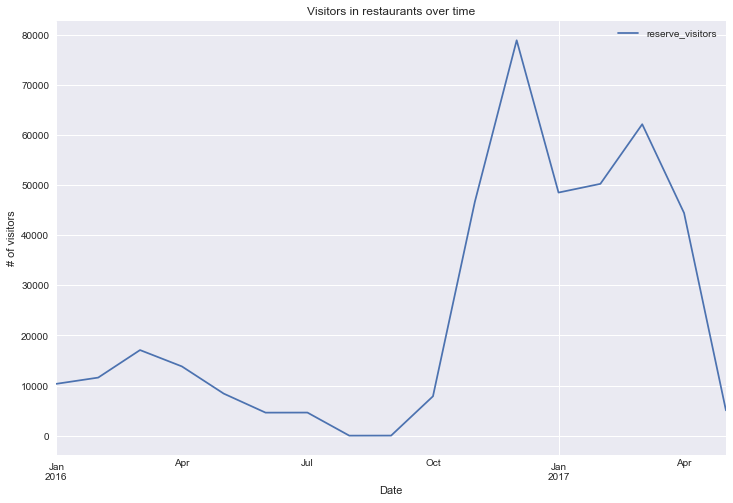

In [23]:
ax = df_visits.resample('M').sum().plot(figsize=(12,8), 
                                        title='Visitors in restaurants over time');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

# set ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())
# set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))